# VINAY KUMAR
# 214102315
# Assignment 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
from scipy import *
from scipy.integrate import quad
from math import sin,cos, pi, exp
from mpmath import nsum
import warnings;
warnings.simplefilter('ignore')

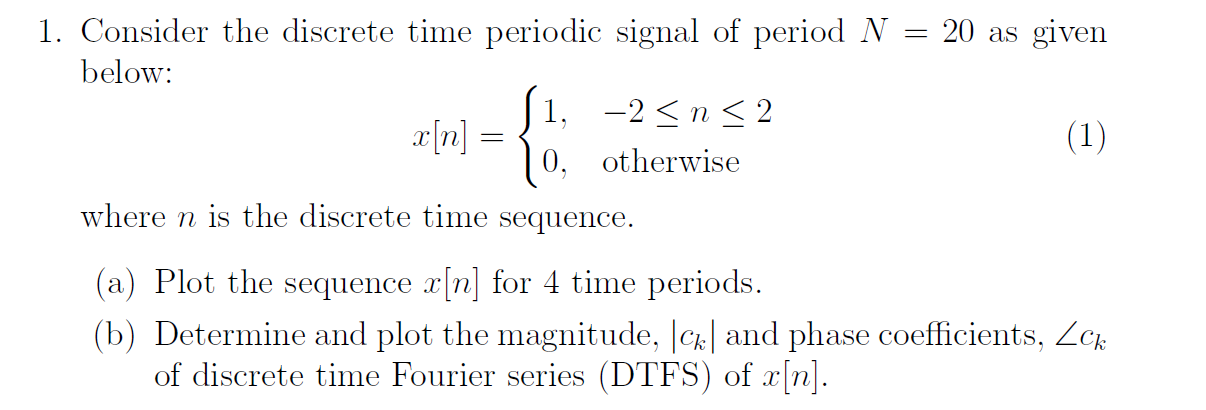

# 1

Text(0, 0.5, 'Phase of Ck')

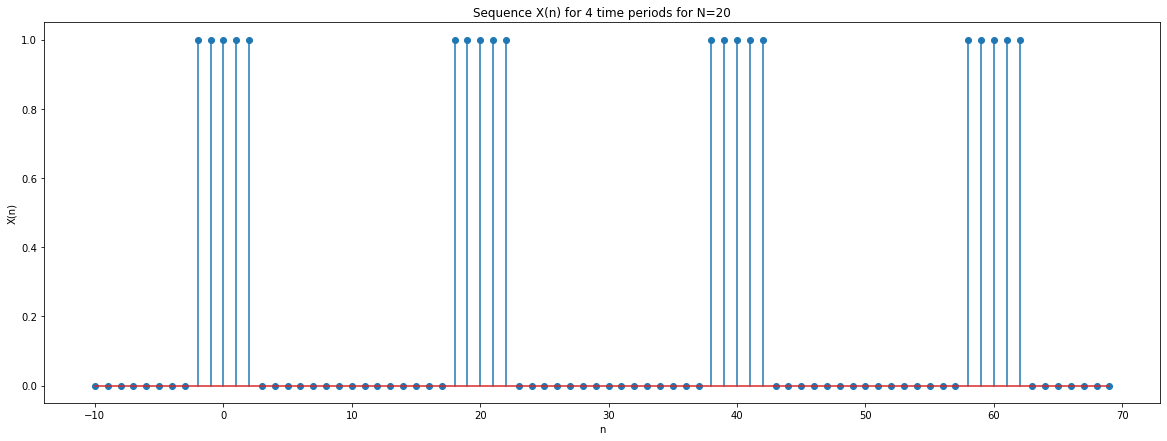

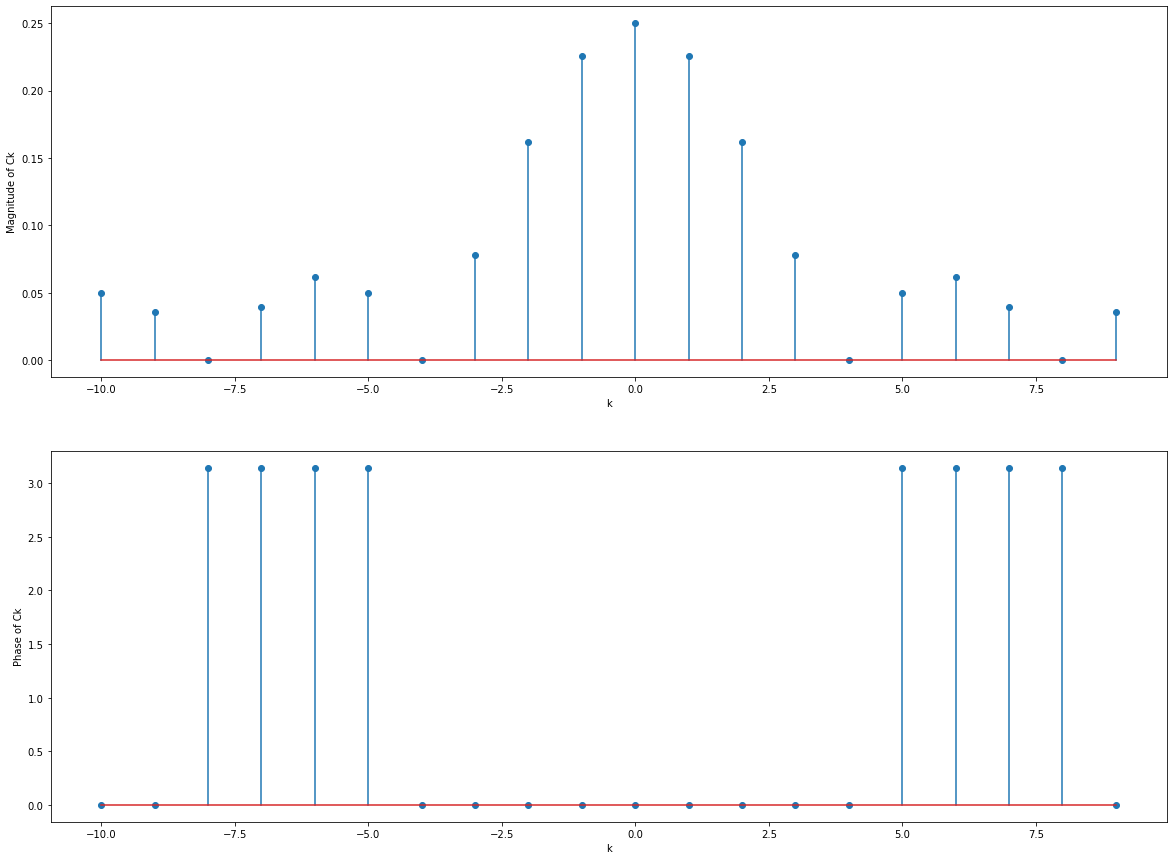

In [2]:

n = np.arange(-10,10,1)
n1= np.arange(-10,70,1)     # for 4 period wave
N = len(n)
def f(n,N):
    Xn = []
    for i in n:
    
        if N-2<= i <= N+2:
            Xn.append(1)
        else:
            Xn.append(0)
    return np.array(Xn)

Xn = f(n,0)
X1 = f(n1,0) + f(n1,N) + f(n1,2*N) + f(n1,3*N)

def DTFS(Xn,n):
    N = len(n)
    Ckr = []
    Cki = []
    k = n
    Ck = []
    
    for i in range(N):
        a = 1/N*(np.sum(Xn*np.exp(-2j*pi*n*k[i]/N)))
        Ck.append(a)
        
    return np.array(Ck)
    
k = n                
C = DTFS(Xn,n)
plt.figure(figsize = (20,7))
plt.stem(n1,X1)
plt.xlabel("n")
plt.ylabel("X(n)")
plt.title("Sequence X(n) for 4 time periods for N=20")

fig, ax = plt.subplots(2,1,figsize = (20,15))
ax[0].stem(k, np.abs(C))
ax[0].set_xlabel("k")
ax[0].set_ylabel("Magnitude of Ck")
ax[1].stem(k, np.angle(C))
ax[1].set_xlabel("k")
ax[1].set_ylabel("Phase of Ck")

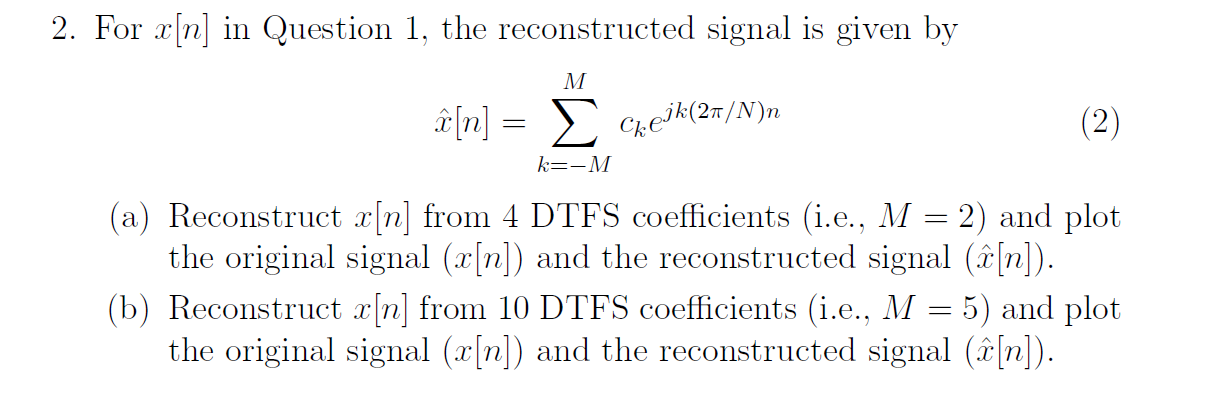

# 2

Text(0.5, 1.0, 'Reconstructed signal for Ck from -10 to 10')

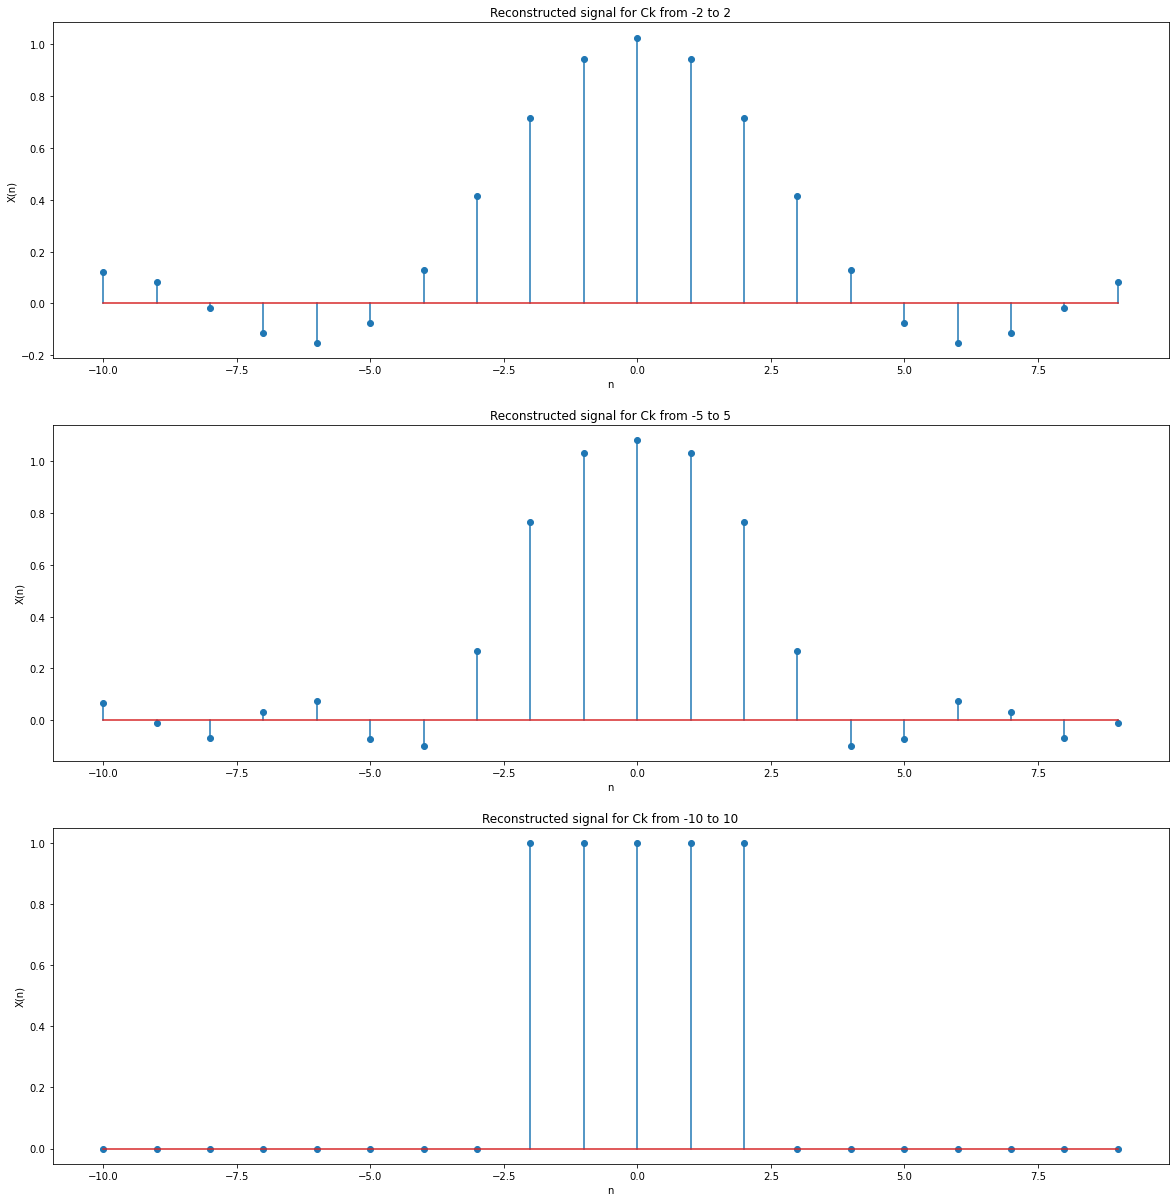

In [3]:
P = np.zeros(len(C))
Q = np.zeros(len(C))

for i in range(len(C)):
    if n[i]<=2 and n[i]>=-2:
        P[i] = C[i]
        
for i in range(len(C)):
    if n[i]<=5 and n[i]>=-5:
        Q[i] = C[i]


def Reco(n,C):
    N = len(n)
    k = n
    Xn = []
    for i in range(N):
        a = np.sum(C*np.exp(2j*pi*k[i]*n/N))
        Xn.append(a)
        
    return Xn


Xn4 = Reco(n,P)
Xn10 = Reco(n,Q)
Xn = Reco(n,C)
        

fig,ax = plt.subplots(3,1,figsize = (20,21))
ax[0].stem(n,Xn4)
ax[0].set_xlabel("n")
ax[0].set_ylabel("X(n)")
ax[0].set_title("Reconstructed signal for Ck from -2 to 2")
ax[1].stem(n,Xn10)
ax[1].set_xlabel("n")
ax[1].set_ylabel("X(n)")
ax[1].set_title("Reconstructed signal for Ck from -5 to 5")
ax[2].stem(n,Xn)
ax[2].set_xlabel("n")
ax[2].set_ylabel("X(n)")
ax[2].set_title("Reconstructed signal for Ck from -10 to 10")

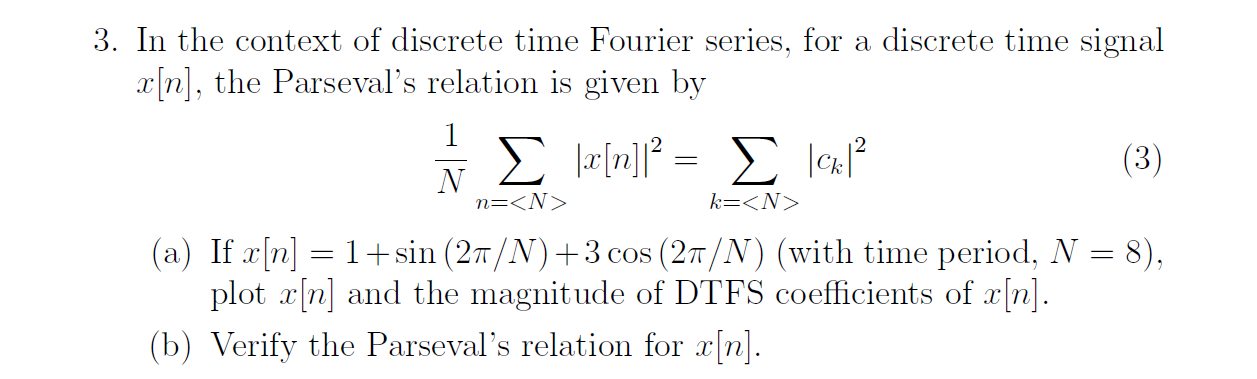

# 3

Text(0.5, 1.0, 'DTFS of X(n)')

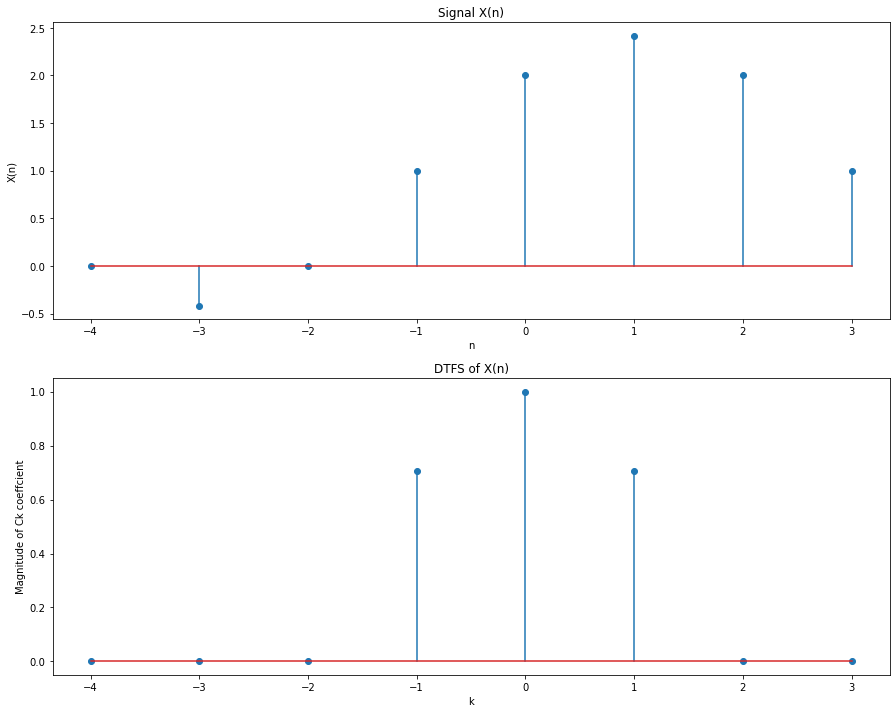

In [4]:
n = np.arange(-4,4,1)
N = 8
Xn = 1 + np.sin(2*pi*n/N) + np.cos(2*pi*n/N)
C = DTFS(Xn,n)

fig,ax = plt.subplots(2,1, figsize = (15,12))
ax[0].stem(n,Xn)
ax[0].set_xlabel("n")
ax[0].set_ylabel("X(n)")
ax[0].set_title("Signal X(n)")
ax[1].stem(n,np.abs(C))
ax[1].set_xlabel("k")
ax[1].set_ylabel("Magnitude of Ck coeffcient")
ax[1].set_title("DTFS of X(n)")

In [5]:
a = 1/N*np.sum(Xn*Xn)
b = np.sum(np.abs(C)*np.abs(C))
if a == b:
    print("Parseval equation verified")
else:
    print("not verified")

print(a)

Parseval equation verified
2.0


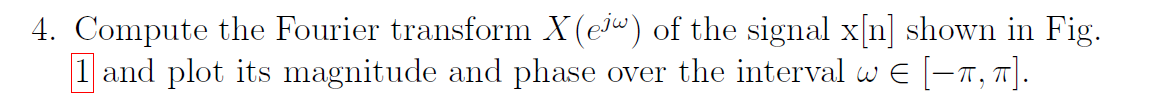

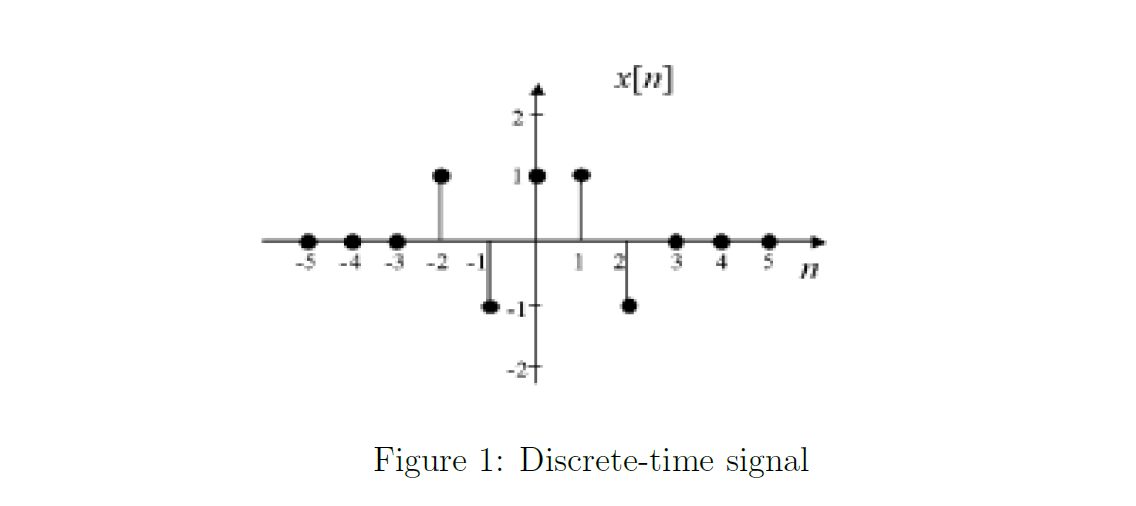

# 4

Text(0.5, 1.0, 'DTFT of X(n)')

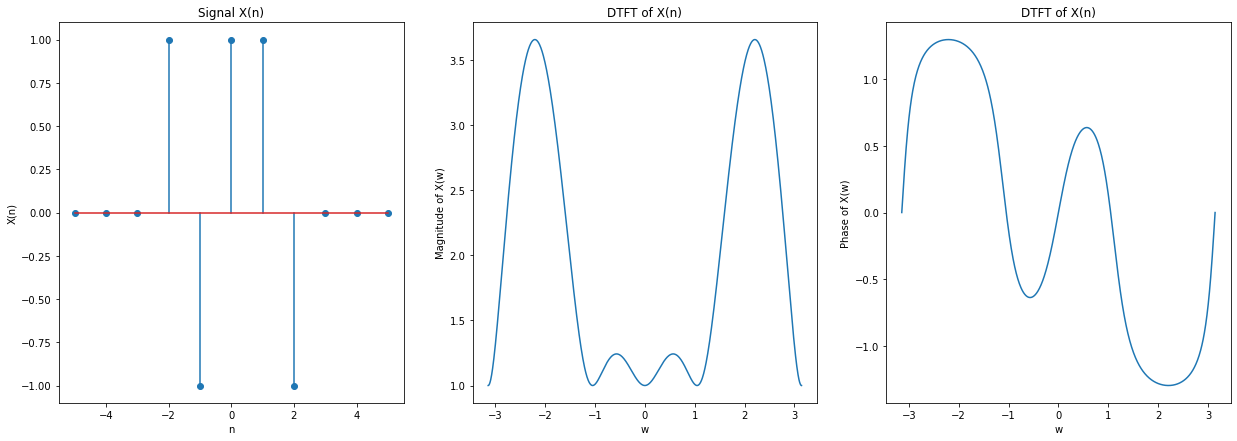

In [6]:
n = np.arange(-5,6,1)
Xn = np.array([0,0,0,1,-1,1,1,-1,0,0,0])
w = np.linspace(-pi,pi,1000)

def DTFT(n,Xn):
    Xw = []
    for i in range(len(w)):
        a = np.sum(Xn*np.exp(-1j*w[i]*n))
        Xw.append(a)
    return Xw

Xw = DTFT(n,Xn)

fig,ax = plt.subplots(1,3,figsize= (21,7))
ax[0].stem(n,Xn)
ax[0].set_xlabel("n")
ax[0].set_ylabel("X(n)")
ax[0].set_title("Signal X(n)")
ax[1].plot(w,np.abs(Xw))
ax[1].set_xlabel("w")
ax[1].set_ylabel("Magnitude of X(w)")
ax[1].set_title("DTFT of X(n)")
ax[2].plot(w,np.angle(Xw))
ax[2].set_xlabel("w")
ax[2].set_ylabel("Phase of X(w)")
ax[2].set_title("DTFT of X(n)")

        
    

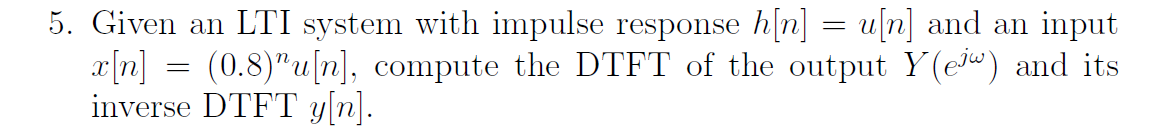

Text(0.5, 1.0, 'Y(n) by taking IDTFT of Y(w)')

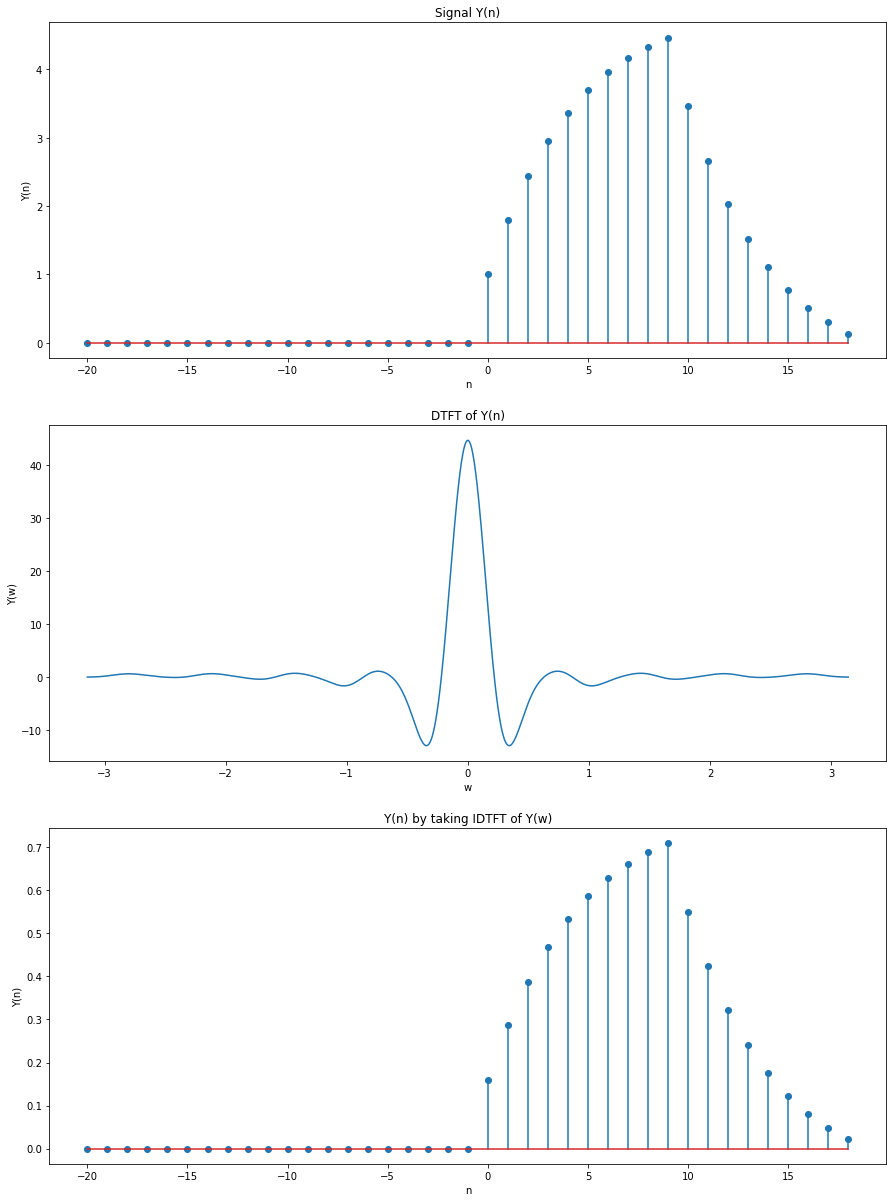

In [7]:
n = np.arange(-10,10,1)
un = np.zeros(len(n))
xn = np.zeros(len(n))
for i in range(len(n)):
    if n[i] >=0:
        un[i] = 1
        xn[i] = (0.8**n[i])
yn = np.convolve(xn,un)
n1 = np.arange(-20,19,1)
Yw = DTFT(n1,yn)

w =  np.linspace(-pi,pi,1000)
def IDTFT(Yw, w):
    
    yn1 = np.zeros(len(yn))
    
    for i in range(len(yn)):
        yn1[i] = np.sum(Yw * np.exp(1j * w * n1[i])) /(2*pi) * 0.001
        
    return yn1

yn1 = IDTFT(Yw,w)

fig,ax = plt.subplots(3,1, figsize = (15,21))
ax[0].stem(n1,yn)
ax[0].set_xlabel("n")
ax[0].set_ylabel("Y(n)")
ax[0].set_title("Signal Y(n)")
ax[1].plot(w,Yw)
ax[1].set_xlabel("w")
ax[1].set_ylabel("Y(w)")
ax[1].set_title("DTFT of Y(n)")
ax[2].stem(n1,yn1)  
ax[2].set_xlabel("n")
ax[2].set_ylabel("Y(n)")
ax[2].set_title("Y(n) by taking IDTFT of Y(w)")
        

# 6
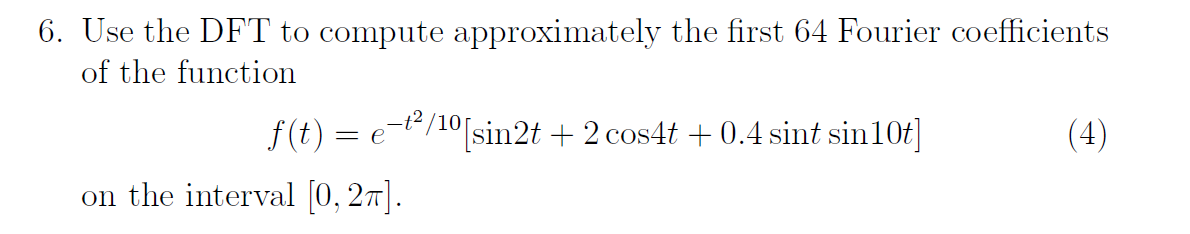

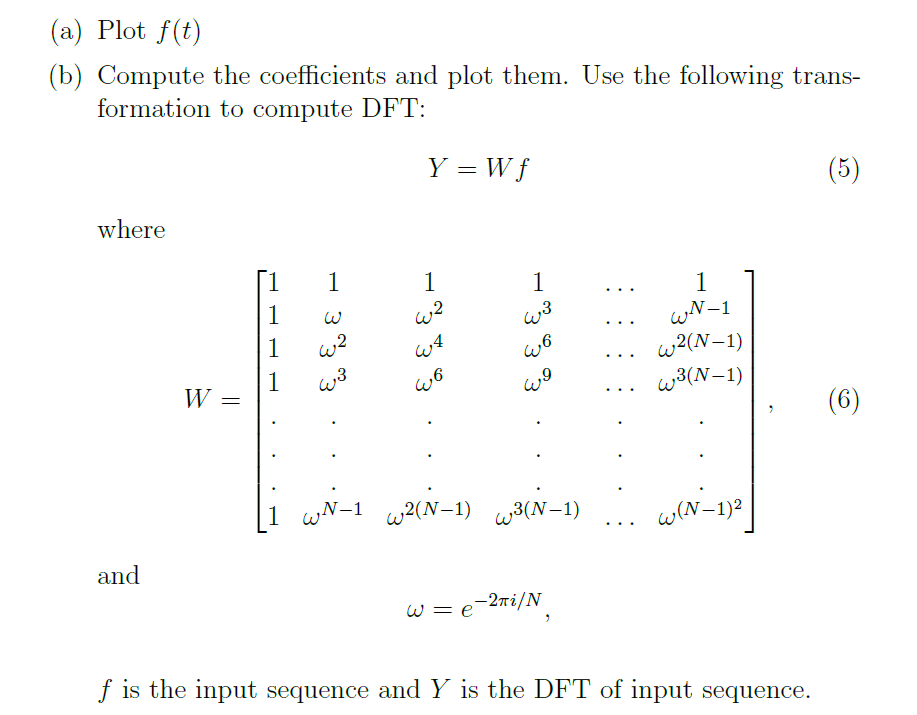

Text(0.5, 1.0, 'DFT of f(t)')

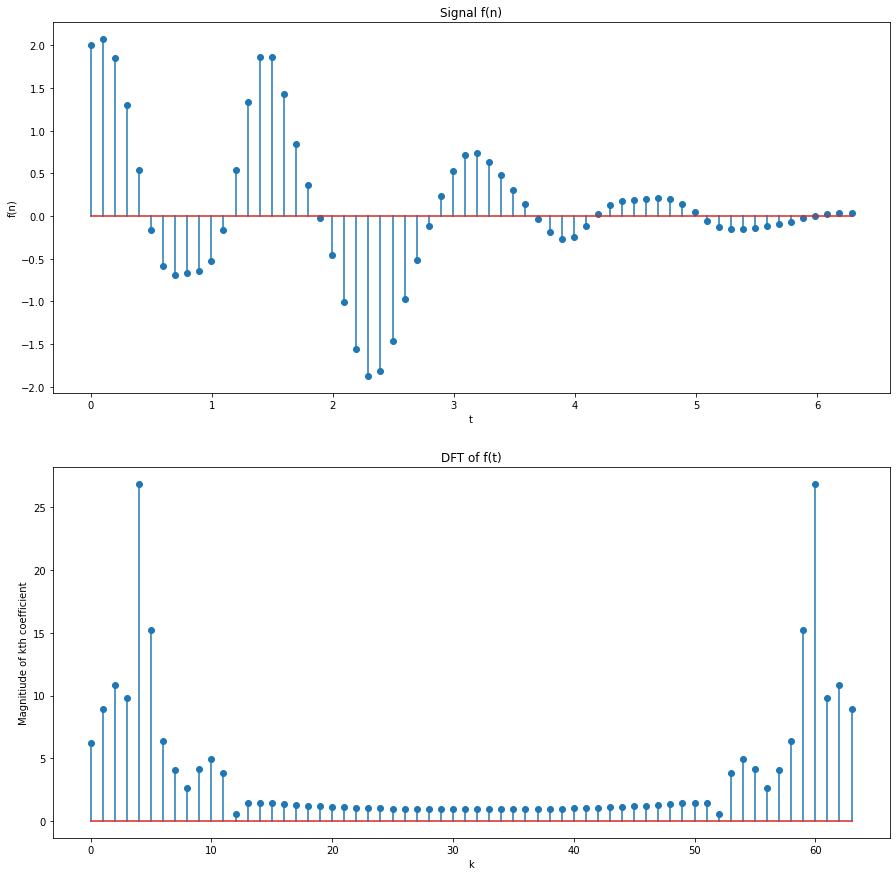

In [8]:
t = np.linspace(0,2*pi,64)
f = np.exp(-t*t/10)*(np.sin(2*t) + 2*np.cos(4*t) + 0.4*np.sin(t)*np.sin(10*t))

N = 64
n = np.arange(0,64,1)
W = np.zeros((N,N) , dtype= np.complex)

for i in range(N):
    for j in range(N):
        W[i][j] = np.exp(-2j*pi/N)**(i*j)
        
DFT = np.matmul(W,f)

fig,ax = plt.subplots(2,1, figsize=(15,15))

ax[0].stem(t,f)
ax[0].set_xlabel("t")
ax[0].set_ylabel("f(n)")
ax[0].set_title("Signal f(n)")
ax[1].stem(n,np.abs(DFT))
ax[1].set_xlabel("k")
ax[1].set_ylabel("Magnitiude of kth coefficient")
ax[1].set_title("DFT of f(t)")

# 7

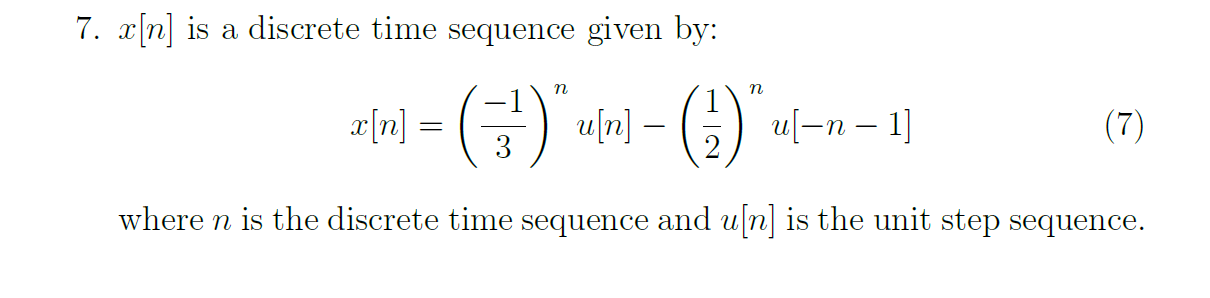

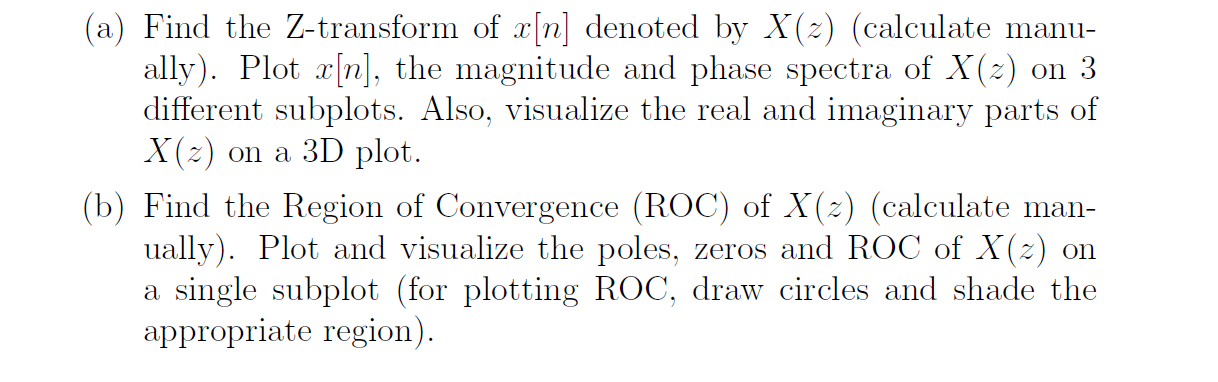

Text(0.5, 1.0, 'Z Transform of X(n)')

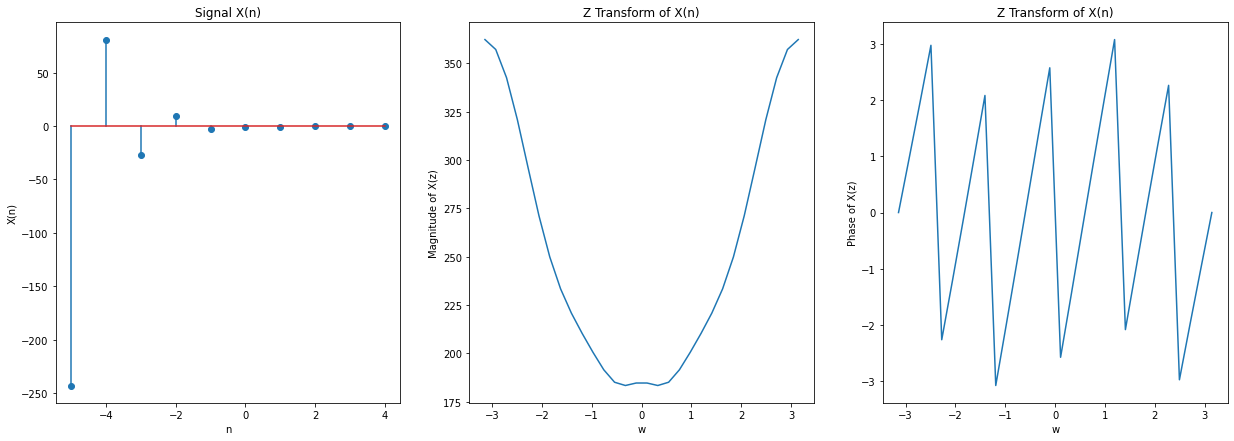

In [10]:
n = np.arange(-5,5,1)


def f(n):
    Xn = []
    for i in n:
        if i<=-1:
            a = (-1/3)**i
            Xn.append(a)
        else:
            a = -(1/2)**i
            Xn.append(a)
    return np.array(Xn) 

Xn = f(n)

w = np.linspace(-pi,pi,30)
def ZT(n,Xn):
    Xz = []
    for i in range(len(w)):
        a = np.sum(Xn*np.exp(-1j*w[i]*n))
        Xz.append(a)
    return np.array(Xz)

Xz = ZT(n,Xn)

fig,ax = plt.subplots(1,3,figsize= (21,7))
ax[0].stem(n,Xn)
ax[0].set_xlabel("n")
ax[0].set_ylabel("X(n)")
ax[0].set_title("Signal X(n)")
ax[1].plot(w,np.abs(Xz))
ax[1].set_xlabel("w")
ax[1].set_ylabel("Magnitude of X(z)")
ax[1].set_title("Z Transform of X(n)")
ax[2].plot(w,np.angle(Xz))
ax[2].set_xlabel("w")
ax[2].set_ylabel("Phase of X(z)")
ax[2].set_title("Z Transform of X(n)")

<function matplotlib.pyplot.show(*args, **kw)>

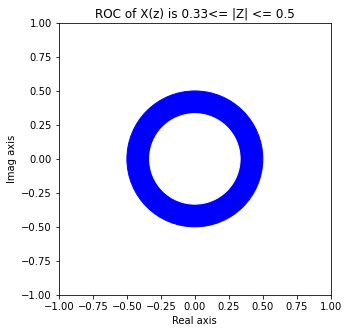

In [11]:
# for poles
poles = np.array([0.5,-0.333])
zeros = 1/12

fig, ax = plt.subplots(figsize = (5,5))
circle1 = plt.Circle((0,0), 0.5, color = 'blue')
circle2 = plt.Circle((0,0), 0.333, color = 'white')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_xlabel("Real axis")
ax.set_ylabel("Imag axis")
ax.set_title("ROC of X(z) is 0.33<= |Z| <= 0.5")
ax.set_aspect(1)
ax.add_artist(circle1)
ax.add_artist(circle2)
plt.show

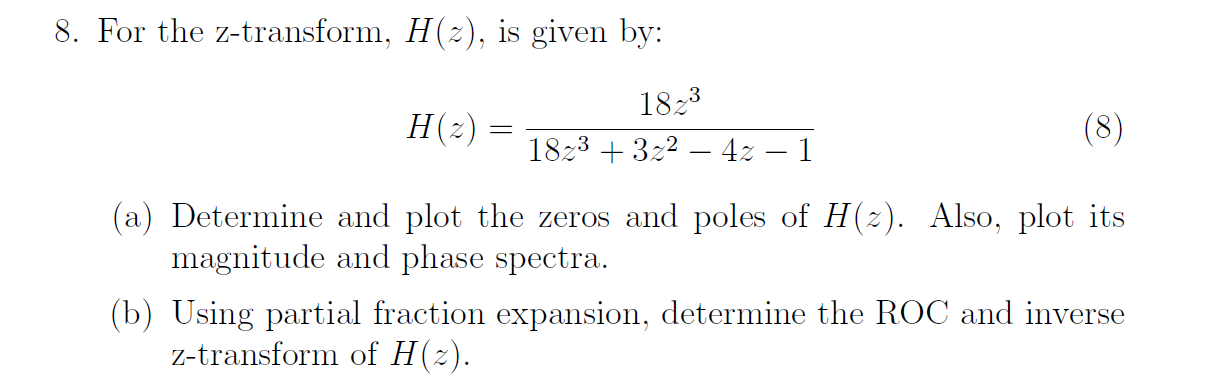

# 8

Text(0.5, 1.0, 'Z Transform')

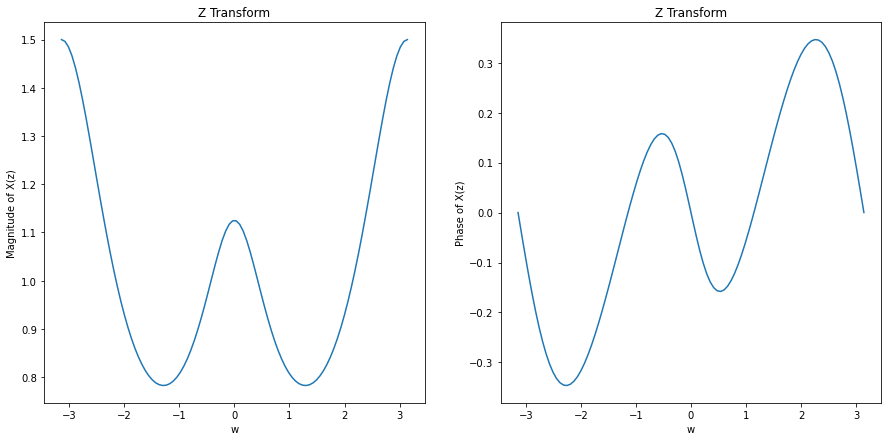

In [12]:
w = np.linspace(-pi,pi,100)
Xzn = (18*np.exp(3j*w))
Xzd = (18*np.exp(3j*w) + 3*np.exp(2j*w) - 4*np.exp(1j*w) -np.exp(0*w))
Xz = Xzn / Xzd

fig,ax = plt.subplots(1,2,figsize = (15,7))
ax[0].plot(w,np.abs(Xz))
ax[0].set_xlabel("w")
ax[0].set_ylabel("Magnitude of X(z)")
ax[0].set_title("Z Transform")
ax[1].plot(w,np.angle(Xz))
ax[1].set_xlabel("w")
ax[1].set_ylabel("Phase of X(z)")
ax[1].set_title("Z Transform")

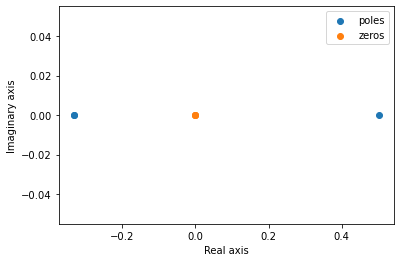

In [13]:
poles = np.array([-0.33,-0.33,0.5])
zeros = np.array([0,0,0])
value = np.array([0,0,0])
plt.scatter(poles,value,label = 'poles')
plt.scatter(zeros,value,label = 'zeros')
plt.xlabel("Real axis")
plt.ylabel("Imaginary axis")
plt.legend()


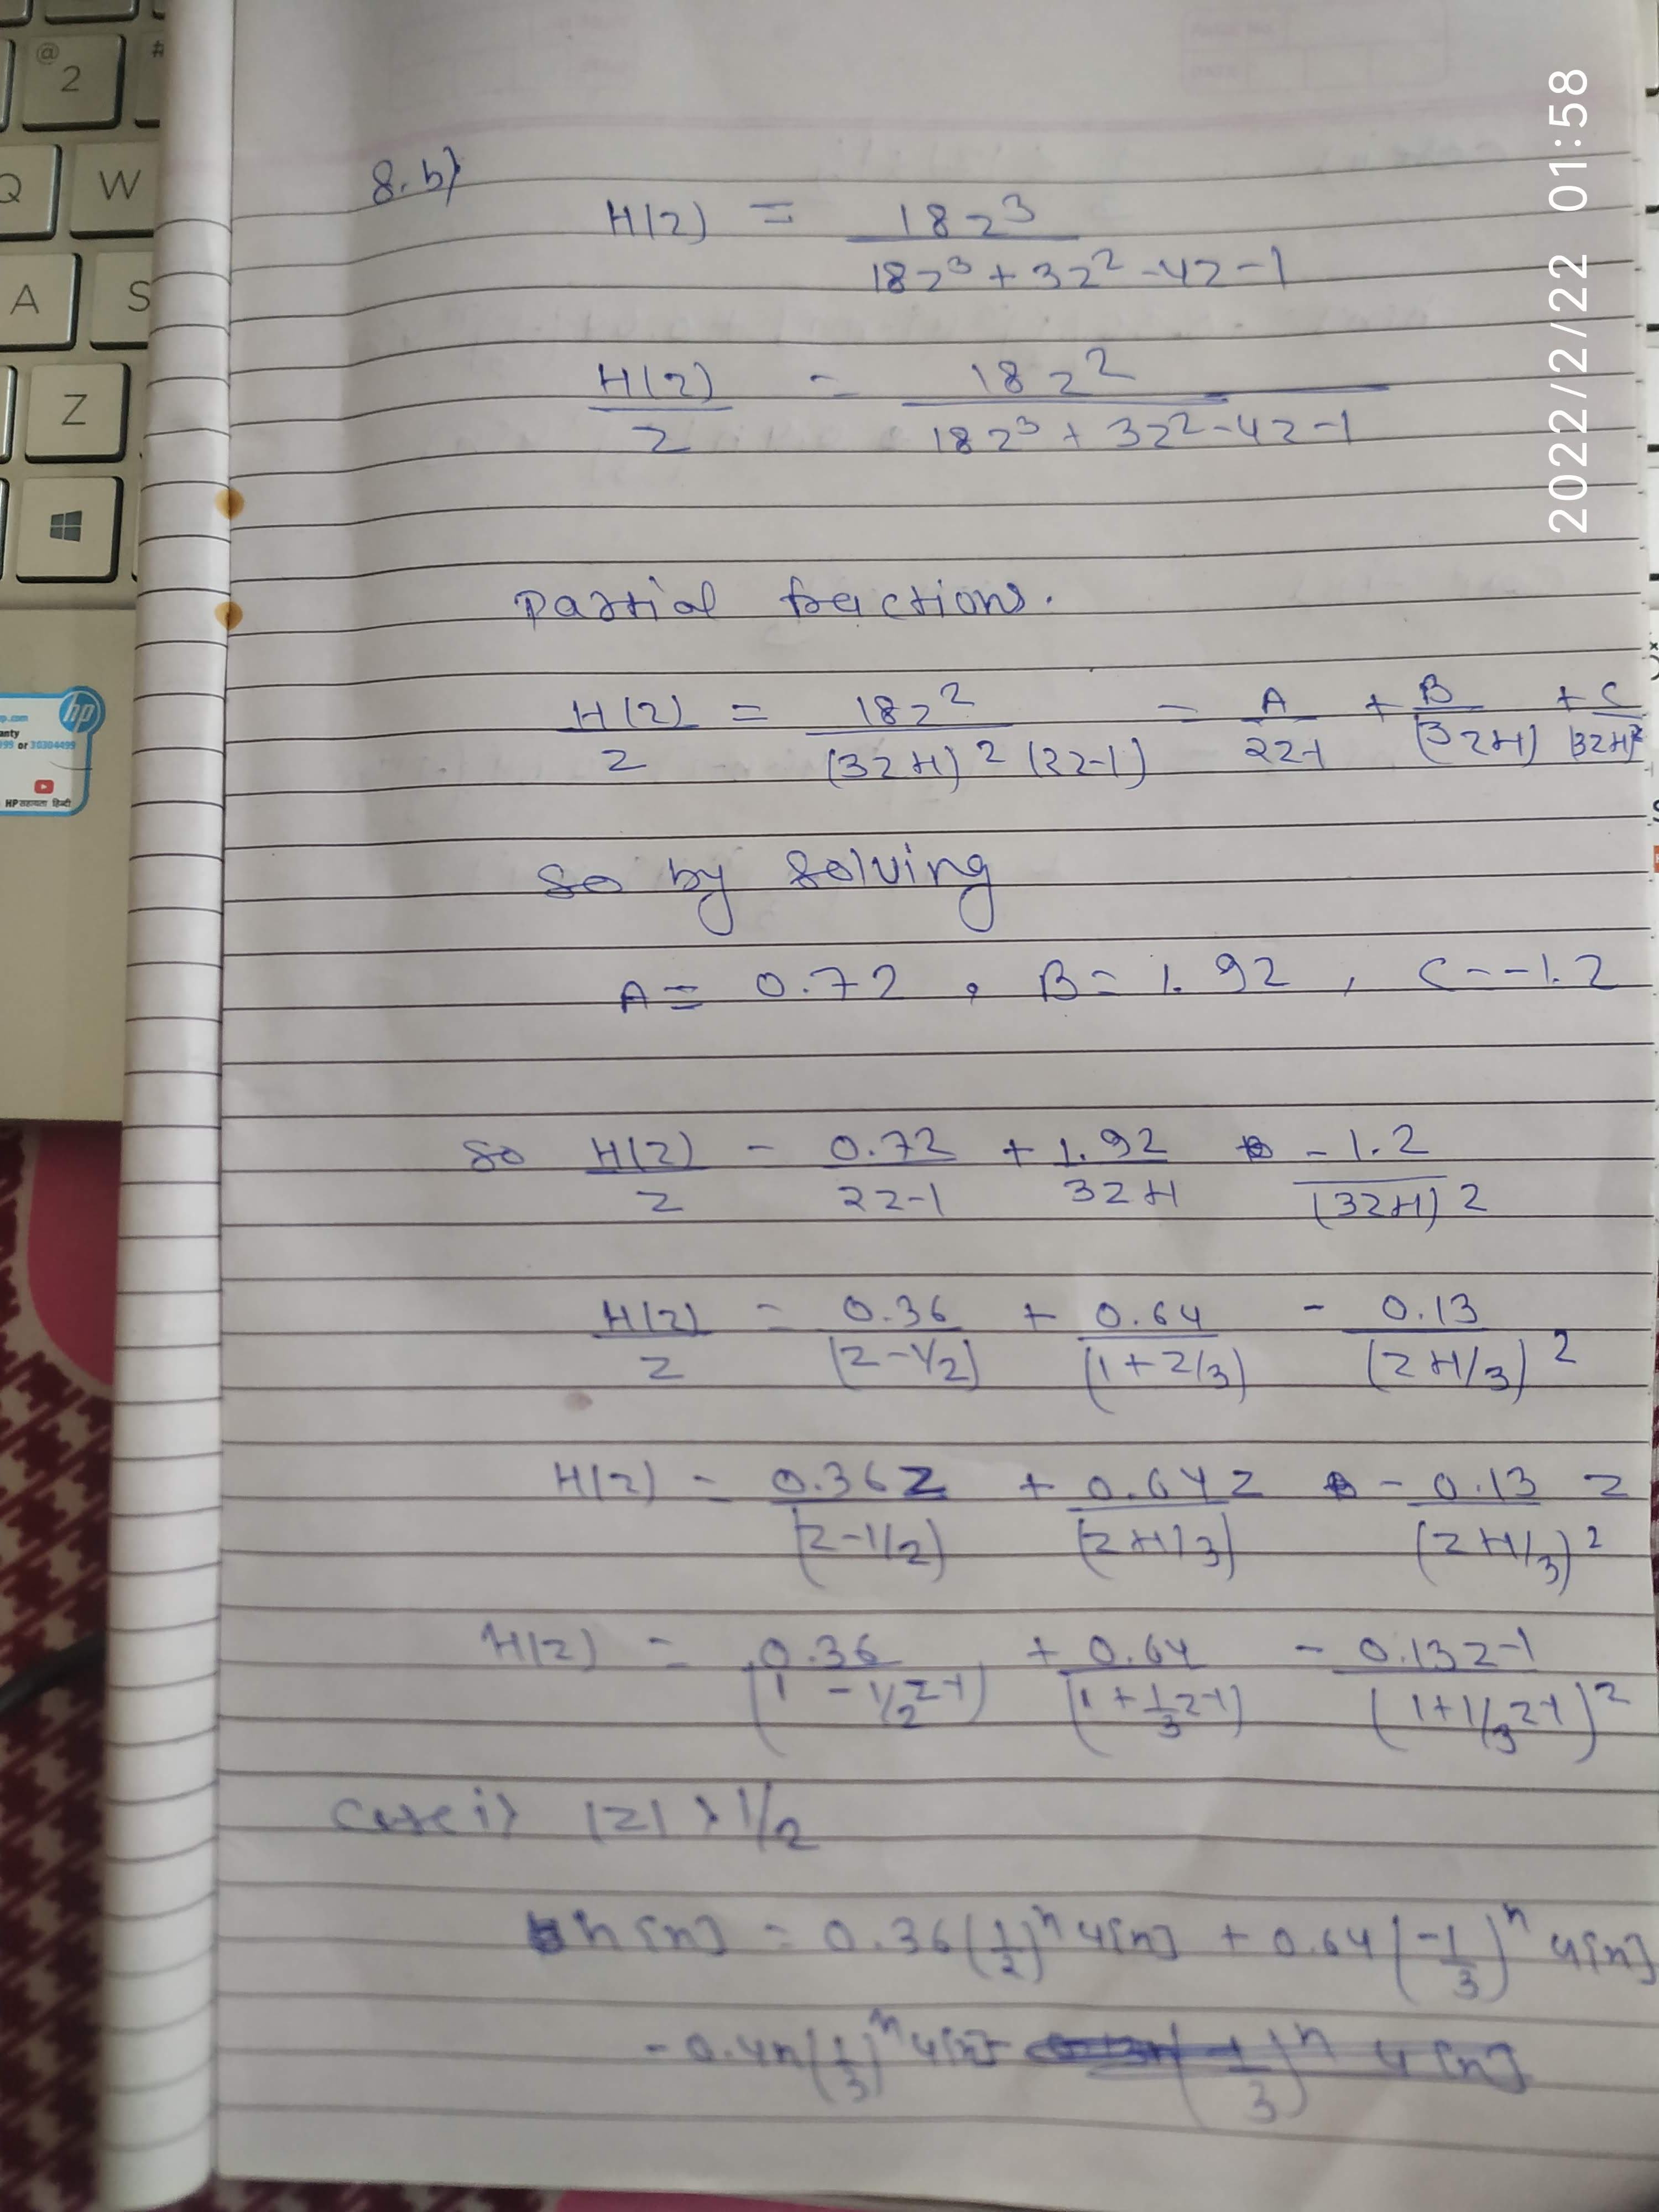
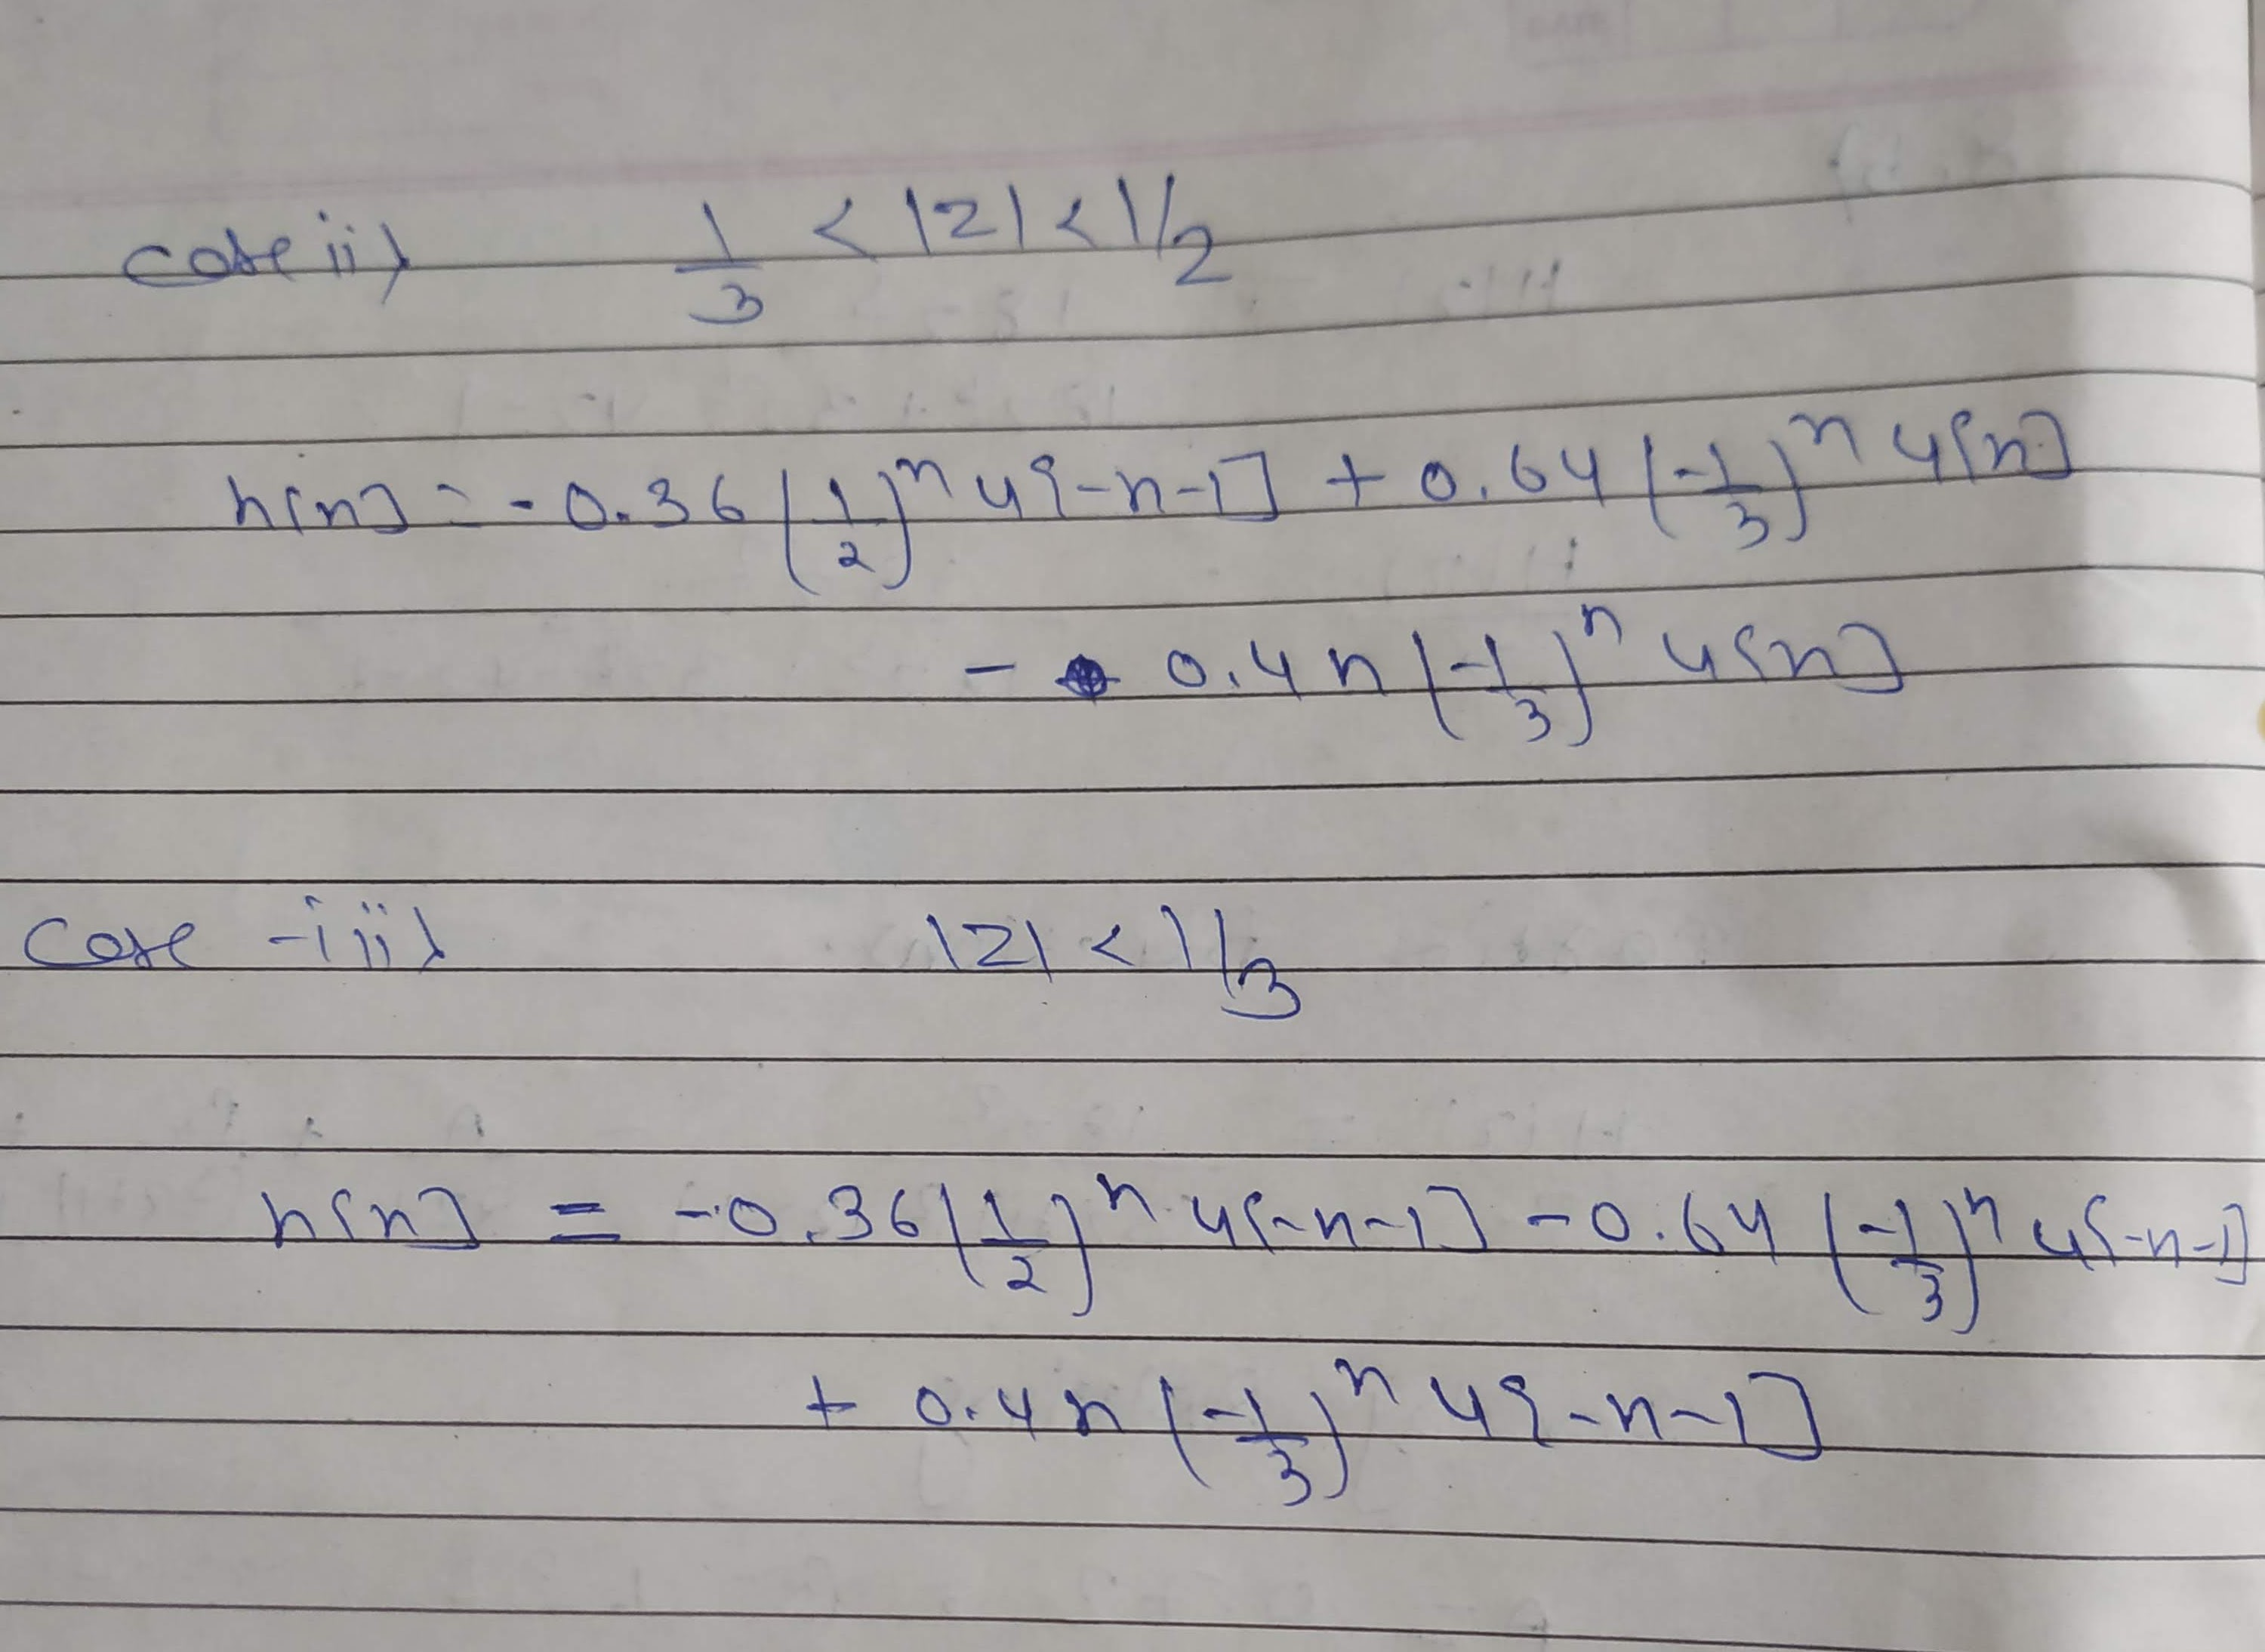

# 9
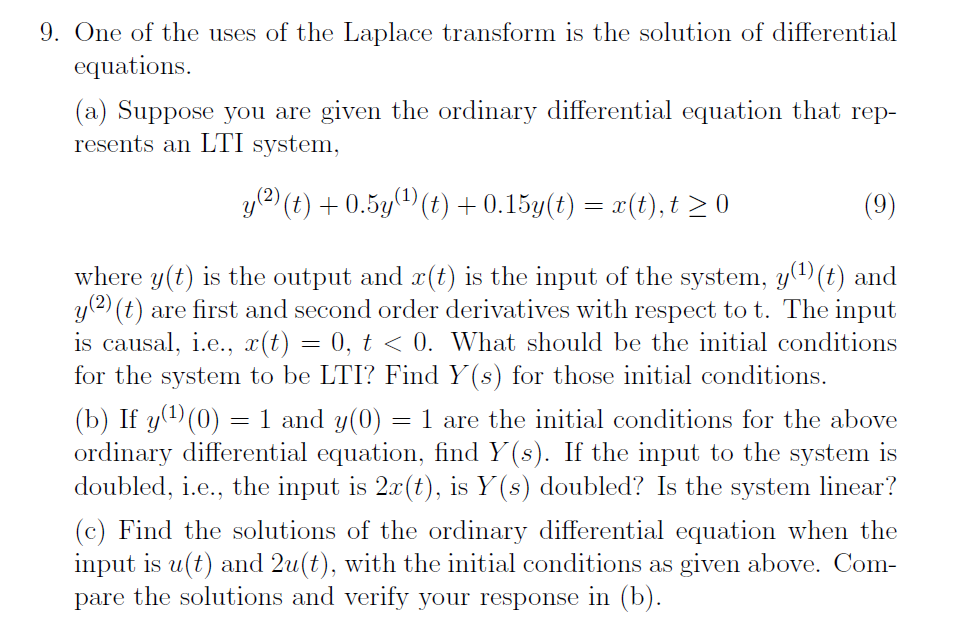

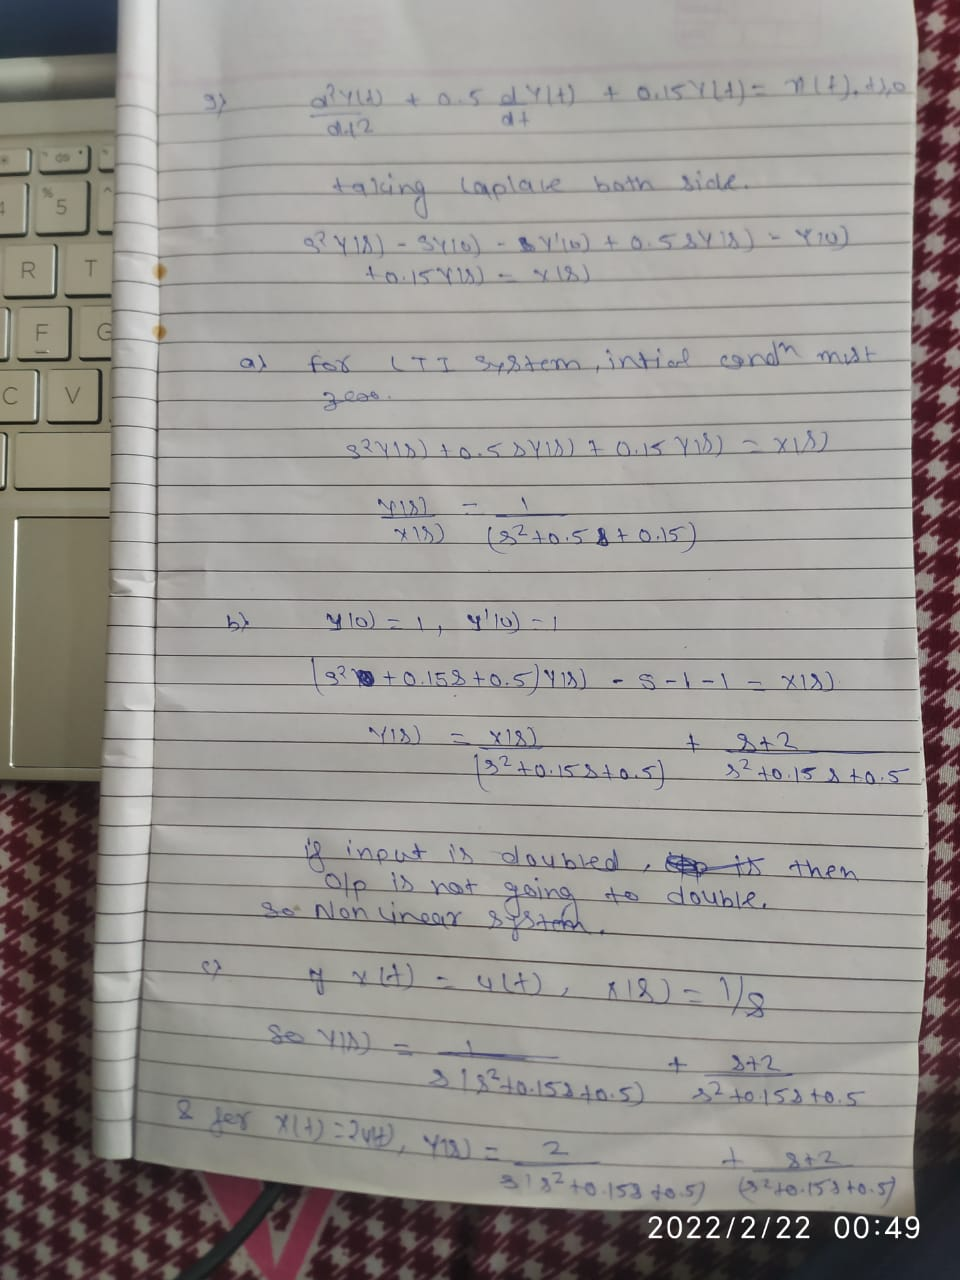

# 10
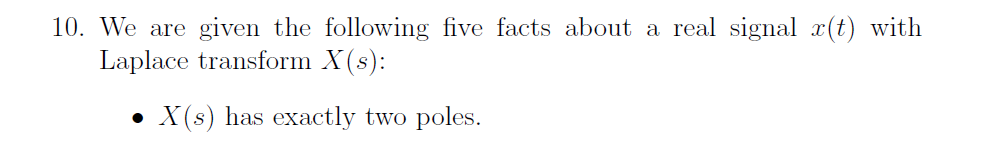

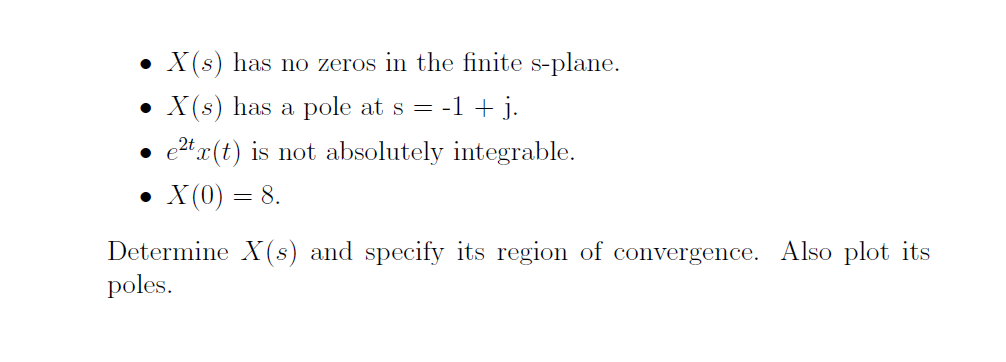

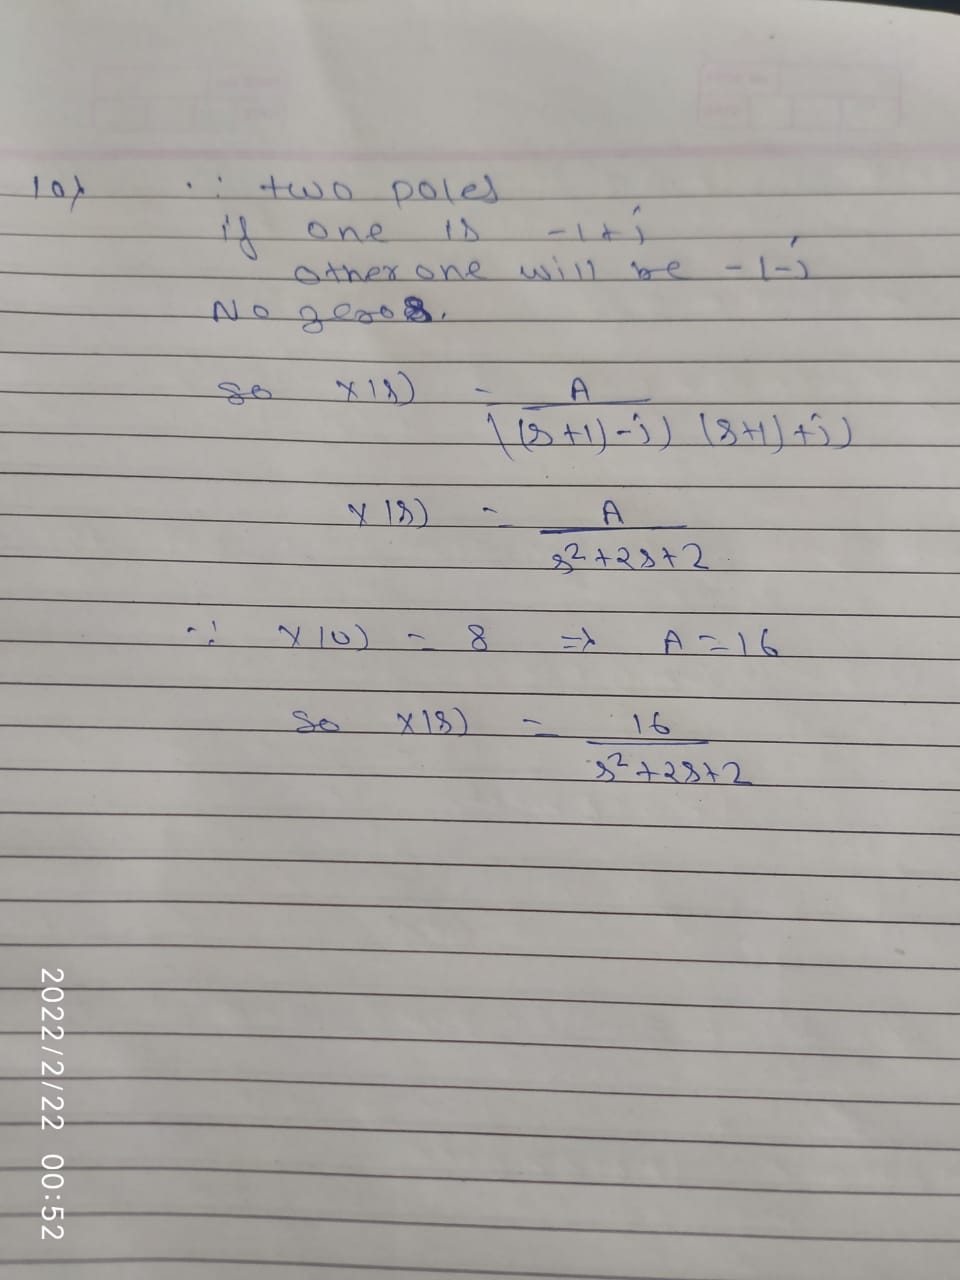

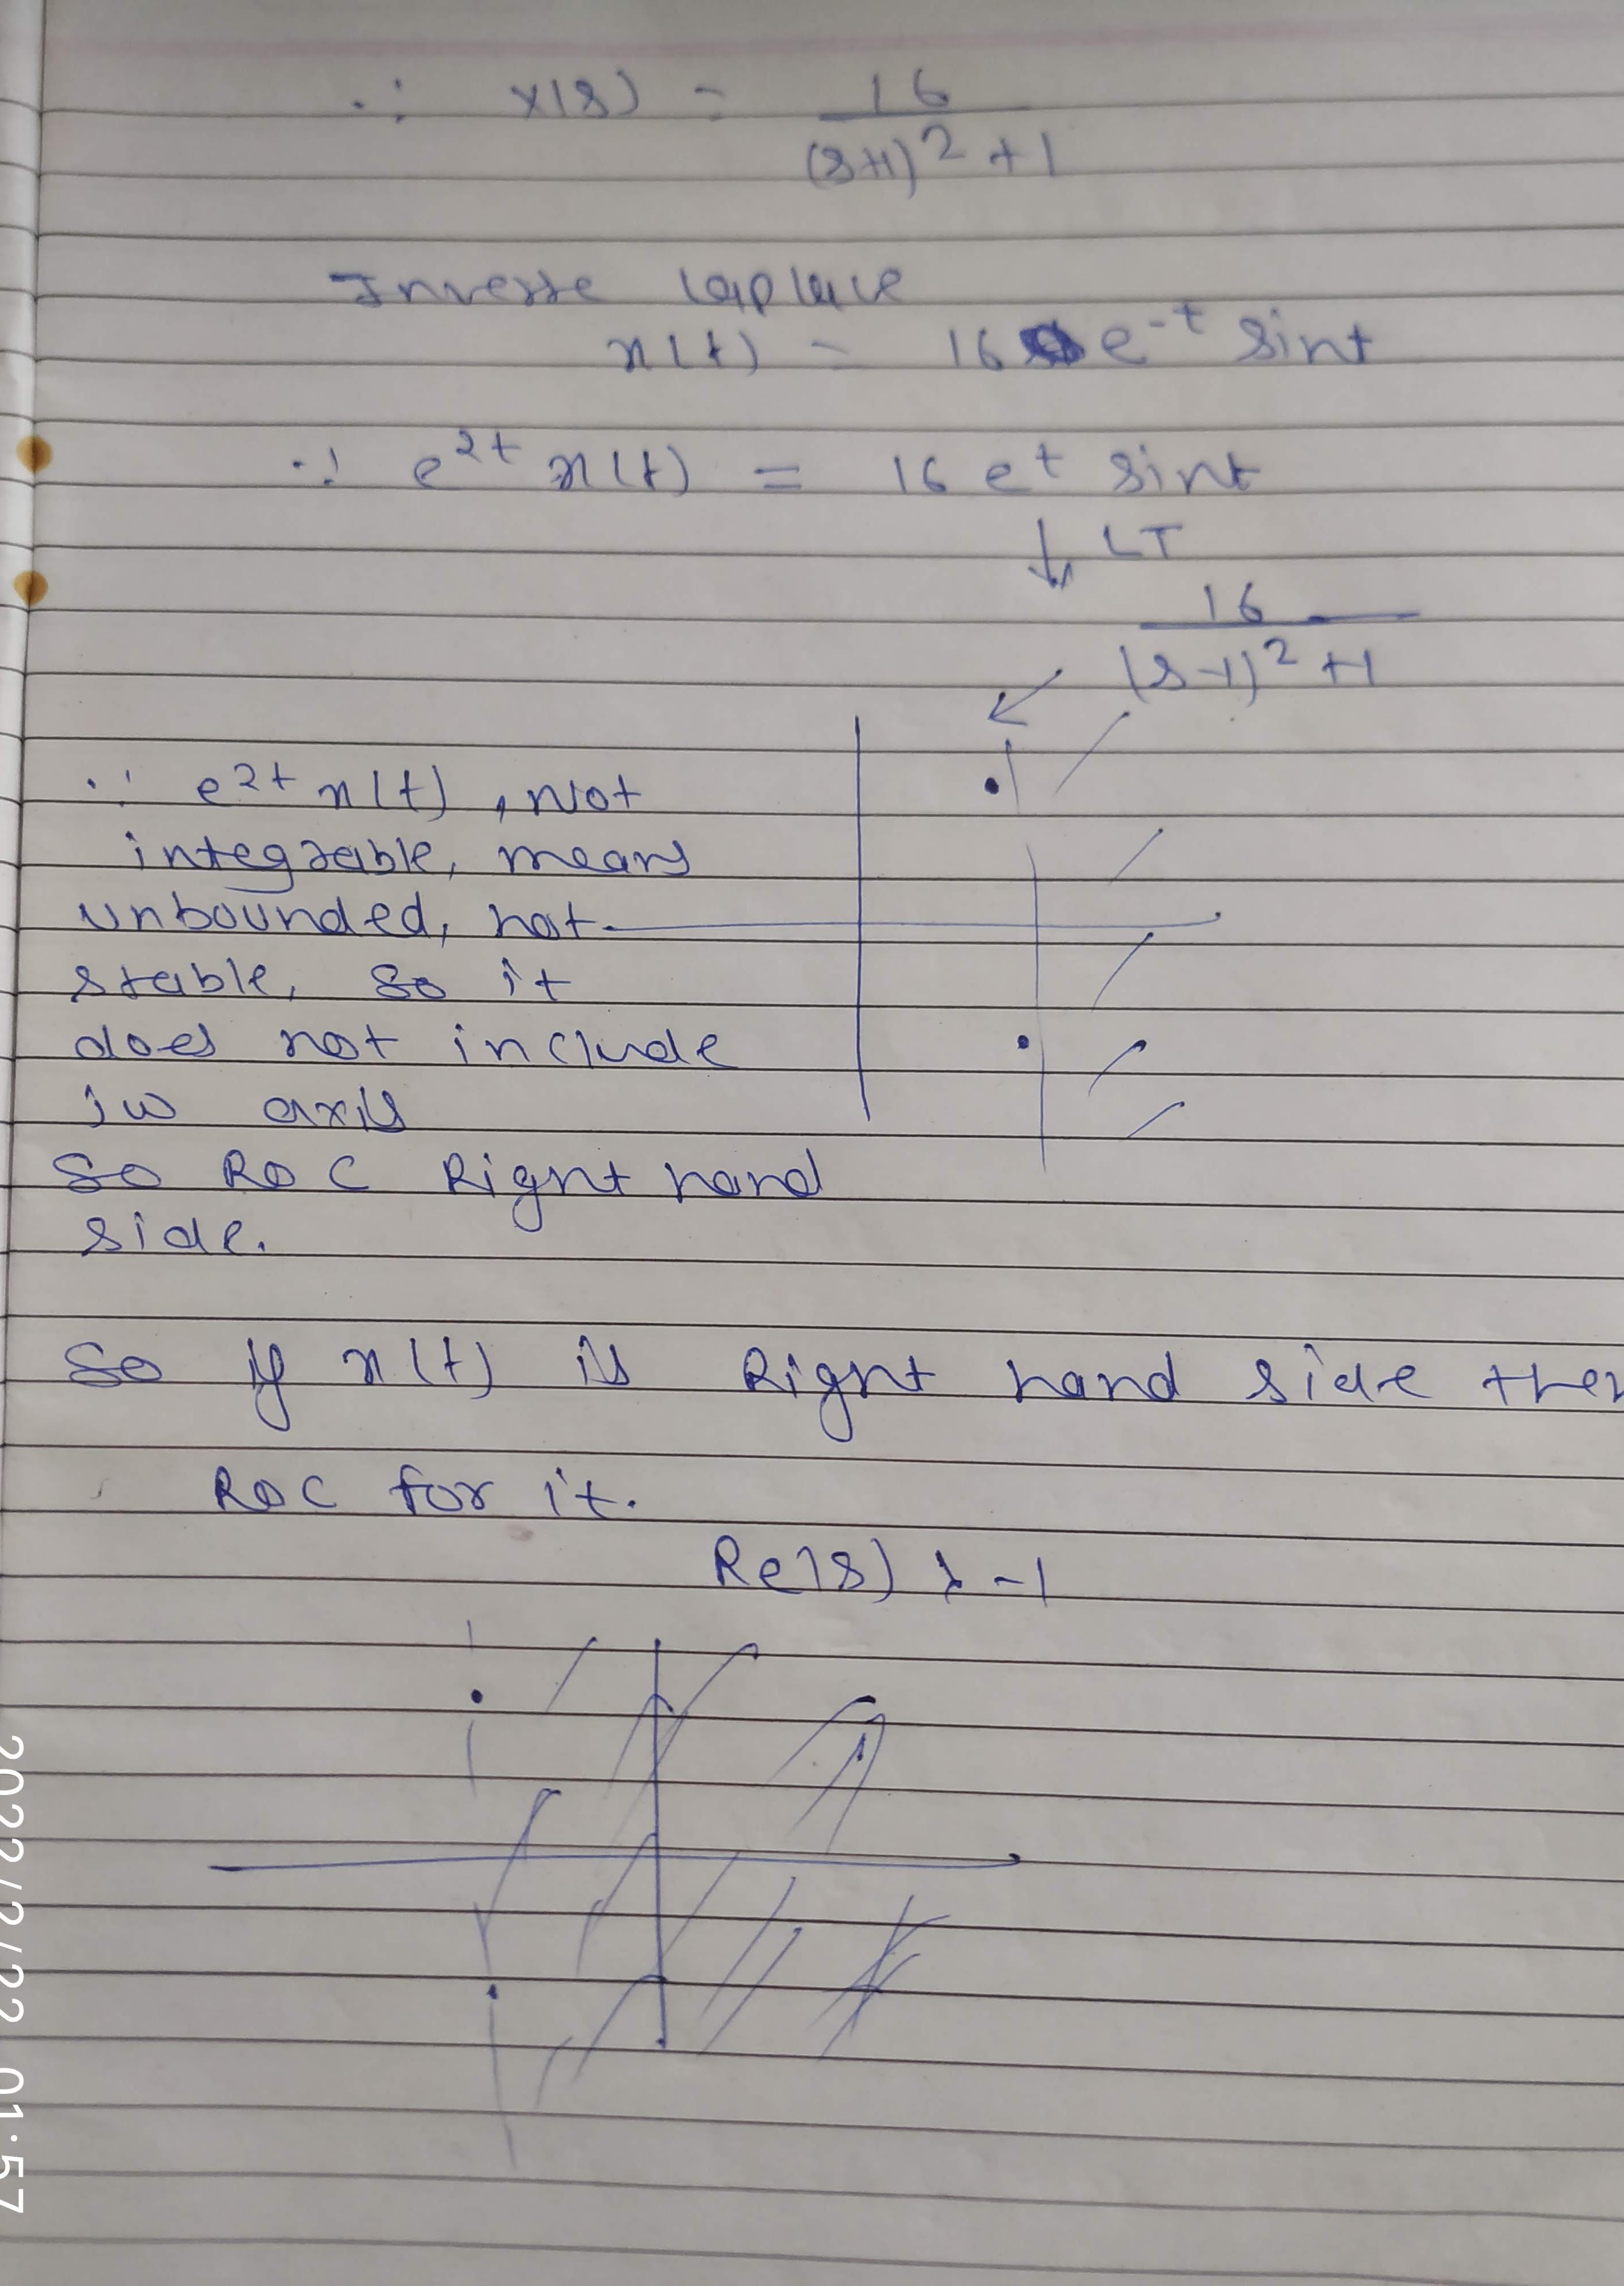

Text(0.5, 1.0, 'Pole of laplace eqn')

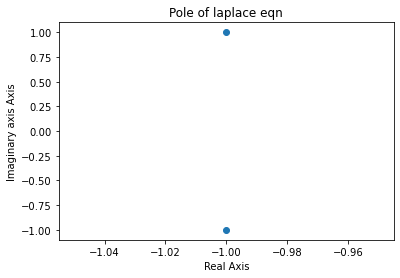

In [14]:
plt.scatter((-1,-1),(1,-1))
plt.xlabel("Real Axis")
plt.ylabel("Imaginary axis Axis")
plt.title("Pole of laplace eqn")